<a href="https://colab.research.google.com/github/rageya/FashionMNIST/blob/main/FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Computer Vision

In [ ]:
### Getting the data ready

In [ ]:
import torch
from torch import nn

# import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.5.1+cu121
0.20.1+cu121


### Getting Dataset

Using FashionMNIST

In [ ]:
# settting training data

train_data = datasets.FashionMNIST(
    root = 'data', #where to download data
    train = True, # do  we want the training datasets
    download = True, # do we want to download
    transform = torchvision.transforms.ToTensor(), # do we want to transform into tensors
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root = 'data', #where to download data
    train = False, # do  we want the training datasets
    download = True, # do we want to download
    transform = ToTensor(), # do we want to transform into tensors
    target_transform=None
)


100%|██████████| 26.4M/26.4M [00:02<00:00, 11.8MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 203kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.75MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 19.7MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
# see the trainig example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
# check the sahpe of our image
print(f'image shape : {image.shape}')
print(f'image label : {class_names[label]}')

image shape : torch.Size([1, 28, 28])
image label : Ankle boot


In [ ]:
### Visualising data

Image shape torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

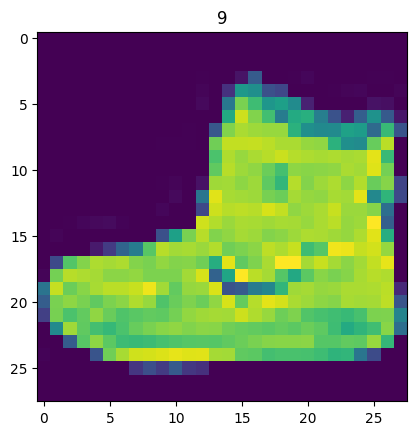

In [ ]:
import matplotlib.pyplot as plt

image, label = train_data[0]
print(f'Image shape {image.shape}')
plt.imshow(image.squeeze())
plt.title(label)

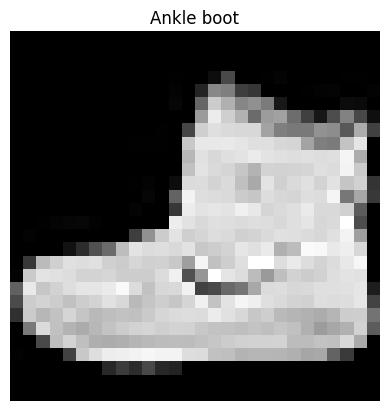

In [ ]:
plt.imshow(image.squeeze(), cmap='grey')
plt.title(class_names[label])
plt.axis(False);

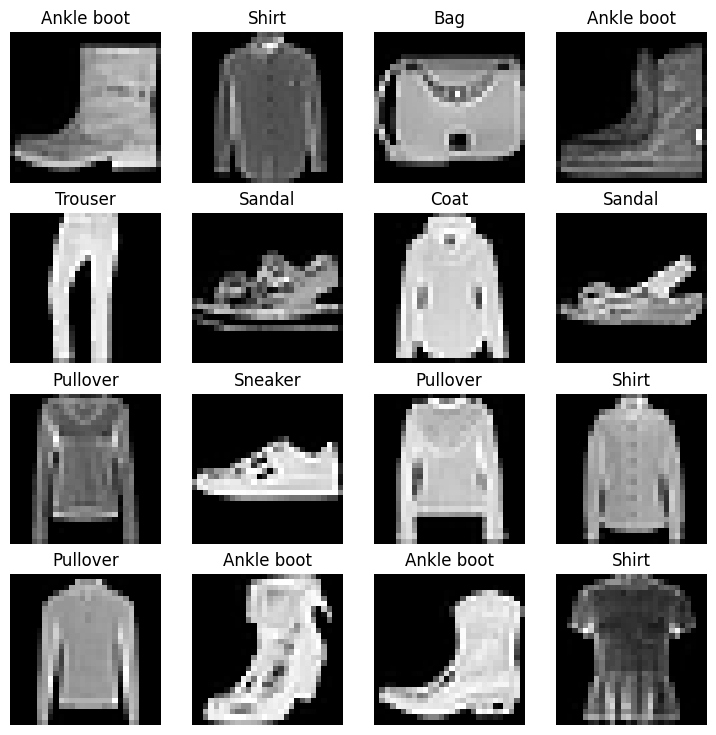

In [ ]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

### Preparing DataLoader

DataLoader turns our datasets into Python iterable

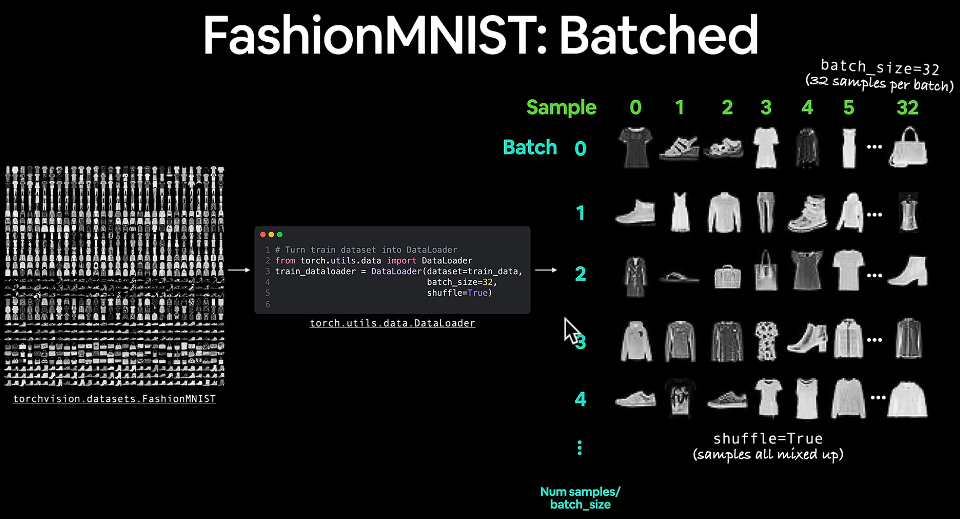

In [ ]:
from torch.utils.data import DataLoader

# setup the baatch size hyperparameter
BATCH_SIZE = 32

# turn datasets into iterables
train_dataloader = DataLoader(dataset = train_data,
                              batch_size=BATCH_SIZE,
                              shuffle = True)

test_dataloader = DataLoader(dataset = test_data,
                             batch_size=BATCH_SIZE,
                             shuffle = False) # no need to shuffle test data

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x782c3cff3370>,
 <torch.utils.data.dataloader.DataLoader at 0x782c3cff23e0>)

In [ ]:
print(f'DataLoaders : {train_dataloader, test_dataloader}')
print(f'Length of train dataloader : {len(train_dataloader)} batches of {BATCH_SIZE}')
print(f'Length of test dataloader : {len(test_dataloader)} batches of {BATCH_SIZE}')

DataLoaders : (<torch.utils.data.dataloader.DataLoader object at 0x782c3cff3370>, <torch.utils.data.dataloader.DataLoader object at 0x782c3cff23e0>)
Length of train dataloader : 1875 batches of 32
Length of test dataloader : 313 batches of 32


In [ ]:
train_features_batch, train_label_batches = next(iter(train_dataloader))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


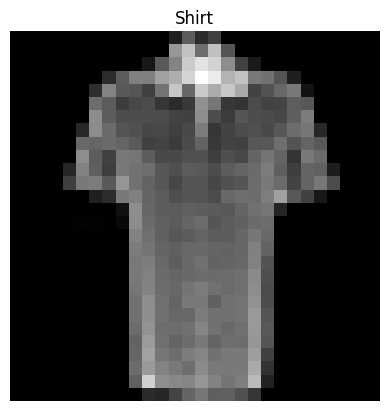

In [ ]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_label_batches[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## Model 0

Baseline model with two linear layers

In [ ]:
#create a a flatten layer
flatten_model = nn.Flatten()

# get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass
print(f'shape before flattening : {x.shape}')
print(f'shape before flattening : {output.shape}')

shape before flattening : torch.Size([1, 28, 28])
shape before flattening : torch.Size([1, 784])


In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int
               ):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape,
                  out_features = hidden_units),
        nn.Linear(in_features = hidden_units,
                  out_features = output_shape)
    )
  def forward(self, x):
    return self.layer_stack(x)


In [ ]:
torch.manual_seed(42)

# setup model with input parameters
model_0 = FashionMNISTModelV0(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names)).to('cpu')

In [ ]:
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.randn(1, 784)
model_0_output = model_0(dummy_x)
model_0_output

tensor([[-0.2228,  0.1477,  0.3137, -0.3110, -0.3713,  0.0156,  0.4363,  0.1060,
         -0.1604, -0.4388]], grad_fn=<AddmmBackward0>)

### Setup loss optimizer and evaluation metrics



*   Loss_fn = CrossEntropyLoss()
*   Optimizer = torch.optim.SGD()
*   Eval metrics = Accuracy






In [ ]:
import requests
from pathlib import Path

# Download helper functions
if Path("helper_functions.py").is_file():
  print("Helper function exists")
else:
  print("Downloading helper functions")
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py')
  with open("helper_functions.py", 'wb') as f:
    f.write(request.content)

In [ ]:
# importing accuracy metrics from the helper functions
from helper_functions import accuracy_fn

# setup the loss functions
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.1)

#### Function for timing our experiments

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end : float,
                     device : torch.device = None):
  total_time = end-start
  print(f'Train time on {device} : {total_time:.3f} seconds')
  return total_time

### Trainig and testing loops..

In [ ]:
import numpy as np

class EarlyStopper:
    def __init__(self, patience=1, min_delta=0):
        self.patience = patience  # Number of epochs to wait before stopping
        self.min_delta = min_delta  # Minimum change in validation loss to be considered an improvement
        self.counter = 0  # Counter for epochs with no improvement
        self.min_validation_loss = np.inf  # Initialize with a very large value

    def early_stop(self, validation_loss):
        if validation_loss < self.min_validation_loss:
            self.min_validation_loss = validation_loss
            self.counter = 0  # Reset counter if validation loss improves
        elif validation_loss > (self.min_validation_loss + self.min_delta):
            self.counter += 1  # Increment counter if validation loss doesn't improve
            if self.counter >= self.patience:
                return True  # Return True if counter exceeds patience
        return False  # Otherwise, return False

In [ ]:
# import 'tqdm' for progress bar
from tqdm.auto import tqdm

# set the seed
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# set the number of epochs
epochs = 3

# create a training and testing loops
for epoch in tqdm(range(epochs)):
  print(f'Epoch : {epoch}\n------')

  ## trainig
  train_loss = 0
  # Add a loop to loopt throught the training batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()

    # forward pass
    y_pred = model_0(X)

    # Calculate the loss
    Loss = loss_fn(y_pred, y)
    train_loss += Loss

    # optimizer zero grad
    optimizer.zero_grad()

    #loss backward
    Loss.backward()

    #optimizer step
    optimizer.step()

    #print
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

  # Divide total train loss by len of train dataloader
  train_loss /= len(train_dataloader)    # finds average loss per epoch

  ## Testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:

      #forward pass
      test_pred = model_0(X_test)

      #calulate the loss
      test_loss += loss_fn(test_pred, y_test)

      # Calculate accuracy
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    # Calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    # Calculate the test acc average per batch
    test_acc /= len(test_dataloader)

  # print
  print(f'Train loss : {train_loss:.4f} | Test loss : {test_loss:.4f} | Test acc : {test_acc:.4f}')

  # Calculate training time
  train_end_on_cpu = timer()
  total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                             end=train_end_on_cpu,
                                             device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train loss : 0.5904 | Test loss : 0.5095 | Test acc : 82.0387
Train time on cpu : 9.624 seconds
Epoch : 1
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train loss : 0.4763 | Test loss : 0.4799 | Test acc : 83.1969
Train time on cpu : 19.033 seconds
Epoch : 2
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train loss : 0.4550 | Test loss : 0.4766 | Test acc : 83.4265
Train time on cpu : 27.576 seconds


### Predictions and Model 0 results...

In [ ]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader : torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device):
  # returns a dictionary of model predicting on DataLoader

  loss, acc = 0, 0
  model.eval()
  model.to(device)

  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      X, y = X.to(device), y.to(device)
      #make preds
      y_pred = model(X)

      # Accumulate the loss
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true = y,
                         y_pred = y_pred.argmax(dim=1))

    # scale loss and acc to find the avrage loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

    return {'model_name' : model.__class__.__name__,
            'model_loss' : loss.item(),
            'model_acc' : acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model = model_0,
                               data_loader = test_dataloader,
                               loss_fn = loss_fn,
                               accuracy_fn = accuracy_fn)
model_0_results






  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## Model 1. with Non-linearity

In [ ]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_unit: int,
               output_shape: int,
               ):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=output_shape),
        nn.ReLU(),
        nn.Linear(in_features=hidden_unit,
                  out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)

model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_unit=10,
                              output_shape=len(class_names)).to(device)

next(model_1.parameters()).device

device(type='cuda', index=0)

### Loss, Optimizer and evaluation metrics

In [ ]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

### Function for training and testing loops

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [ ]:
torch.manual_seed(42)

from timeit import default_timer as timer
train_time_on_gpu = timer()

# set the epochs
epochs = 3

# create a optimization and eval loop using train/test functions
for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch}\n------')
  train_step(model=model_1,
             data_loader = train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device = device)

  test_step(model=model_1,
            data_loader = test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Train loss: 1.09199 | Train accuracy: 61.34%
Test loss: 0.95636 | Test accuracy: 65.00%

Epoch: 1
------
Train loss: 0.78101 | Train accuracy: 71.93%
Test loss: 0.72227 | Test accuracy: 73.91%

Epoch: 2
------
Train loss: 0.67027 | Train accuracy: 75.94%
Test loss: 0.68500 | Test accuracy: 75.02%

Train time on cuda : 31.292 seconds


In [ ]:
total_train_time_model_0

27.575751055000012

In [ ]:
model_1_results = eval_model(model = model_1,
                               data_loader = test_dataloader,
                               loss_fn = loss_fn,
                               accuracy_fn = accuracy_fn,
                             device=device)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

## Building a CNN Model

site : cnn explorer

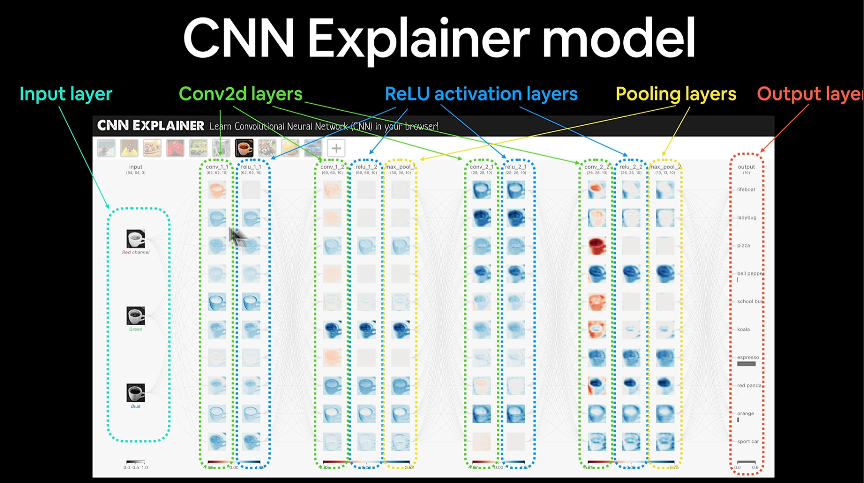

In [ ]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),

            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

### Stepping through Conv2d


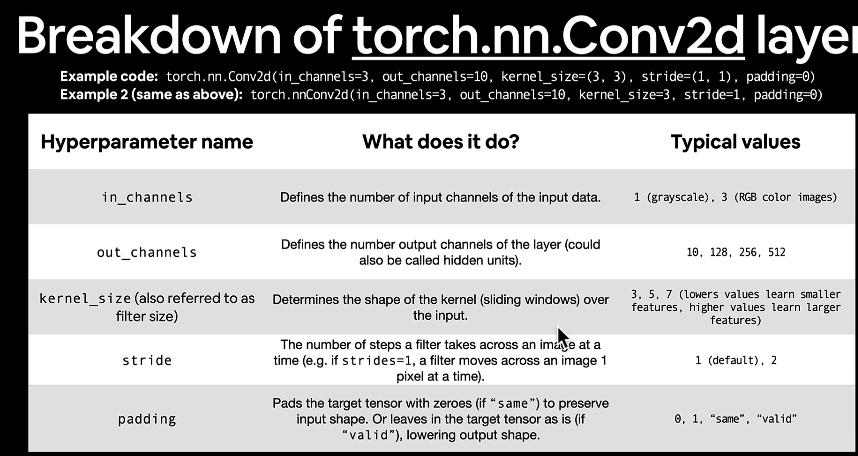

In [ ]:
torch.manual_seed(42)

#create a batch of image
images = torch.randn(size=(32,3,64,64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])


In [ ]:
# create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=1)

# pass the data through CNN
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 64, 64])

### Stepping through MaxPool2d

In [ ]:
# print orginal image shape
print(f"Test image original shape: {test_image.shape}")

Test image original shape: torch.Size([3, 64, 64])


### Training CNN model

In [ ]:
# setup loss functions/eval metrics/optimizer

from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

In [ ]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(data_loader=test_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.58790 | Train accuracy: 78.62%
Test loss: 0.38824 | Test accuracy: 86.10%

Epoch: 1
---------
Train loss: 0.36113 | Train accuracy: 87.07%
Test loss: 0.34738 | Test accuracy: 87.15%

Epoch: 2
---------
Train loss: 0.32315 | Train accuracy: 88.17%
Test loss: 0.32755 | Test accuracy: 88.08%

Train time on cuda : 36.952 seconds


In [ ]:
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3275500237941742,
 'model_acc': 88.07907348242811}

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.327550,88.079073


In [ ]:
# Add training times to results comparison
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,27.575751
1,FashionMNISTModelV1,0.685001,75.019968,31.291561
2,FashionMNISTModelV2,0.327550,88.079073,36.951629


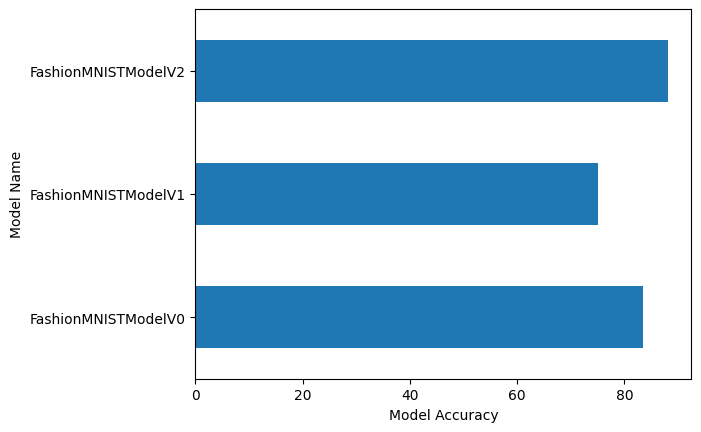

In [ ]:
compare_results.set_index("model_name")["model_acc"].plot(kind='barh')
plt.xlabel("Model Accuracy")
plt.ylabel("Model Name");

### Make and eval random predictions

In [ ]:
def make_preds(model: torch.nn.Module,
               data: list,
               device:torch.device=device):
  pred_probs=[]
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # forward pass
      pred_logits = model(sample)

      # get pred probs (logits to pred probs)
      pred_prob = torch.softmax(pred_logits.squeeze(),dim=0)

      # get pred_prb off the gpu for matplotlib
      pred_probs.append(pred_prob.cpu())

  return torch.stack(pred_probs)

In [ ]:
import random

test_samples=[]
test_labels=[]

for sample,label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

test_samples = torch.stack(test_samples)

In [ ]:
# Make predictions
pred_probs = make_preds(model=model_2,
                   data=test_samples)

# view the first two pred probs
pred_probs[:2]

tensor([[8.5130e-01, 9.3587e-03, 2.3361e-04, 2.6168e-02, 1.2997e-03, 1.9141e-05,
         1.0839e-01, 8.7399e-06, 3.2232e-03, 3.0492e-07],
        [1.6595e-07, 7.9129e-07, 1.3604e-06, 9.1850e-06, 9.8037e-07, 2.4863e-03,
         2.2289e-07, 9.9698e-01, 1.0190e-04, 4.2082e-04]])

In [ ]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([0, 7, 2, 3, 7, 8, 3, 1, 9])

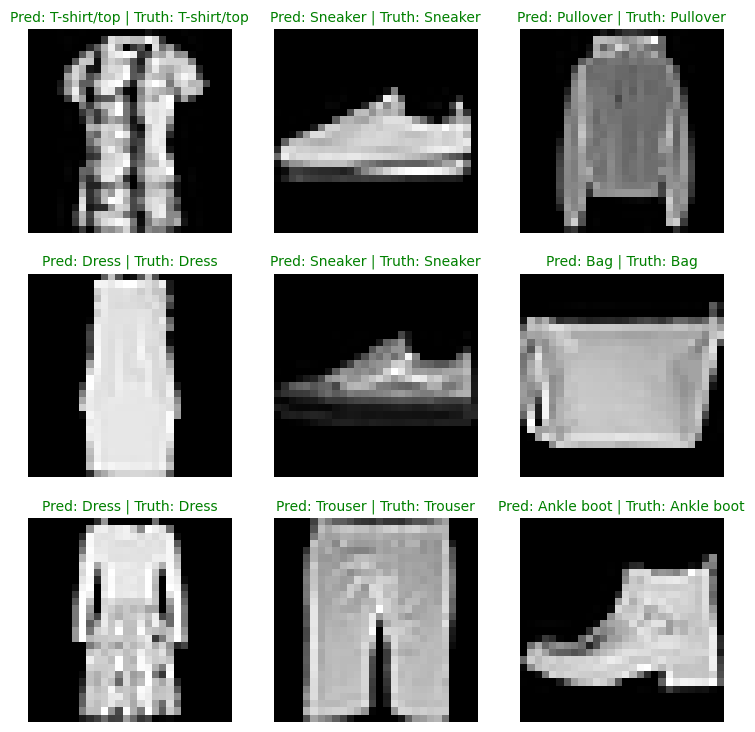

In [ ]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label
  pred_label = class_names[pred_classes[i]]

  # Get the truth label
  truth_label = class_names[test_labels[i]]

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g")
  else:
      plt.title(title_text, fontsize=10, c="r")
  plt.axis(False);

### Making a confusion matrix

In [ ]:
from tqdm.auto import tqdm

# nake preds with trrained model
y_preds =[]
model_2.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader,desc="Making Predictions.."):

    X,y = X.to(device), y.to(device)

    # dothe forward pass
    y_logit = model_2(X)

    # turn the preds from lgits to pred probs
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)

    # put pred off the cpu
    y_preds.append(y_pred.cpu())

#print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor
len(y_pred_tensor)

Making Predictions..:   0%|          | 0/313 [00:00<?, ?it/s]

10000

In [ ]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 22.0 MB/s eta 0:00:00
mlxtend version: 0.23.3


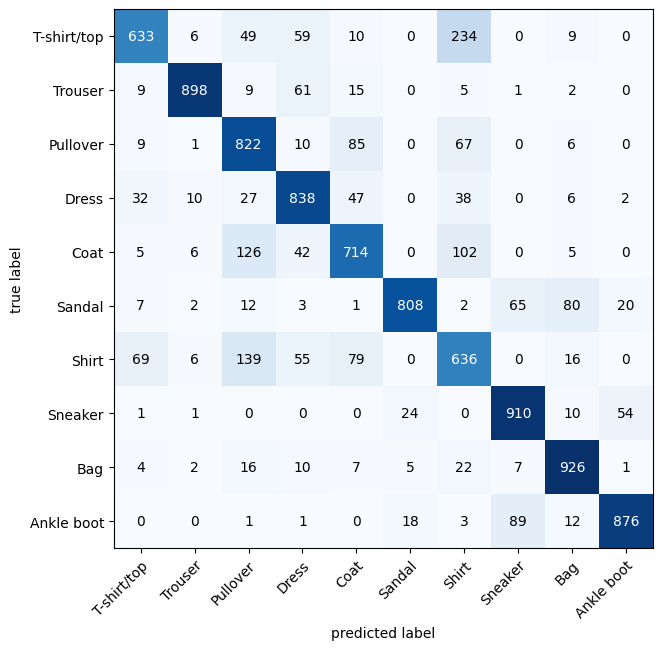

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task="multiclass")
confmat_tensor = confmat(preds = y_pred_tensor, target=test_data.targets)

# Plot the confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),
                                class_names = class_names,
                                figsize=(7,7));
